In [1]:
import pandas as pd

In [17]:
df=pd.read_csv("airfoil_self_noise.dat",sep="\t",header=None)

In [18]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [19]:
df.columns=["Frequency","Angle of attack","chord length","Free-stream velocity","Suction side","pressure level"]

In [20]:
df

,Frequency,Angle of attack,chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [21]:
df.isnull().sum()

Frequency               0
Angle of attack         0
chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [22]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
## First do train & test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train.head()

,Frequency,Angle of attack,chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


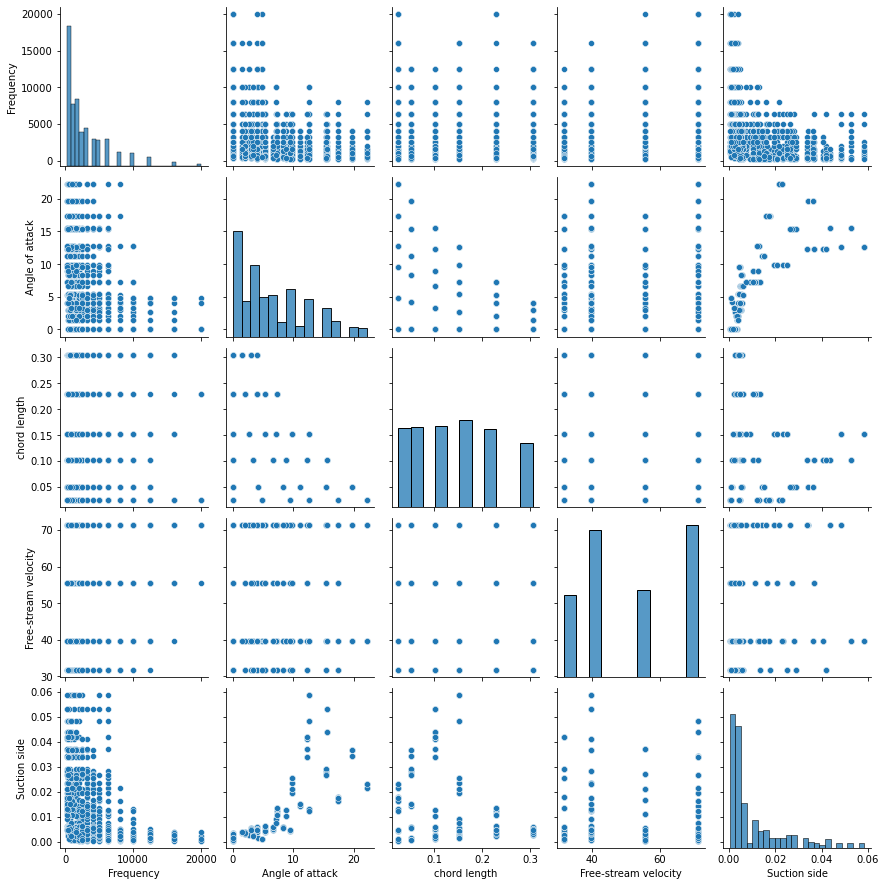

In [25]:
import seaborn as sns
sns.pairplot(X_train)

In [26]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\Yuvraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

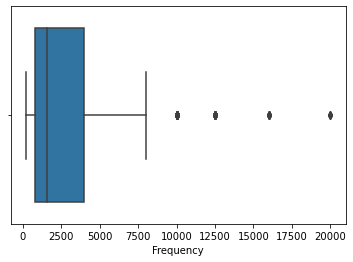

In [27]:
sns.boxplot(X_train["Frequency"])

C:\Users\Yuvraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='pressure level'>

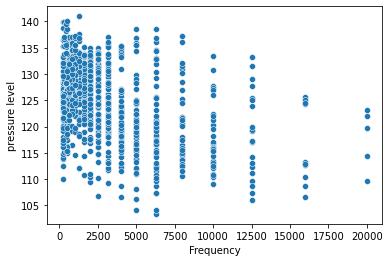

In [29]:
sns.scatterplot(X_train['Frequency'],y)

In [31]:
len(df['pressure level'].unique())

1456

C:\Users\Yuvraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pressure level'>

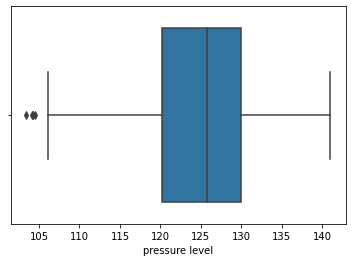

In [32]:
sns.boxplot(df["pressure level"])

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()